
### **Atividade Prática: Introdução ao Processamento de Linguagem Natural (NLP)**  

#### **Objetivos da Atividade**  
1. Compreender os conceitos fundamentais do Processamento de Linguagem Natural (NLP) em português.  
2. Aplicar técnicas de pré-processamento de texto, incluindo remoção de stopwords, stemming e lematização.  
3. Explorar e comparar diferentes representações de texto (Bag of Words e TF-IDF).  
4. Desenvolver modelos de classificação de sentimentos e comparar métricas de desempenho.  

#### **Sumário**  
1. Introdução ao NLP.  
2. Importação das bibliotecas necessárias.  
3. Baixar os datasets de NLP.  
4. Análise do dataset e descrição.  
5. Expressões regulares para limpeza de texto.  
6. Remoção de stopwords.  
7. Lemmatização e Stemming (com tabela comparativa).  
8. Representação de texto com Bag of Words.  
9. Representação de texto com TF-IDF.  
10. Classificação de sentimentos.  
  

---

### **1) Introdução ao NLP**  
O Processamento de Linguagem Natural (NLP) é uma subárea da Inteligência Artificial que busca criar sistemas capazes de entender, interpretar e gerar texto ou fala em linguagem humana.  

Aplicações comuns de NLP incluem:  
- Análise de sentimentos.  
- Tradução automática.  
- Resumo de texto.  
- Sistemas de busca.  
- Assistentes virtuais.  




### **2) Importação das bibliotecas necessárias**  


In [32]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 20.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [6]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import pandas as pd
import random
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')  # Stemmer em português
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hericson/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /home/hericson/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/hericson/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### **3) Dataset sintético para classificação de sentimentos**  
Utilizaremos um dataset sintético em português com dados de sentimentos. Este consiste em reviews de produtos, onde cada texto é rotulado com um sentimento: positivo ou negativo. Esta tarefa é uma **classificação supervisionada**, pois usamos os rótulos (variável dependente) para treinar e avaliar o modelo.

**Descrição das variáveis**:  
- `review`: texto contendo a opinião do usuário.  
- `sentiment`: rótulo associado à opinião (positivo = 1, negativo = 0).  



In [21]:
# Expansão das listas de frases positivas e negativas
frases_positivas_treino = [
    "Adorei o produto! #satisfeito", "Excelente qualidade, recomendo! @lojaTop",
    "Superou minhas expectativas! Veja em https://produto.com/top",
    "Muito bom, chegou antes do prazo. #ótimaCompra",
    "Gostei bastante, produto perfeito. Obrigado @vendedor!",
    "Ótima experiência de compra. #Recomendo",
    "Funciona perfeitamente, estou muito satisfeito. Veja mais: https://review.com/produto",
    "Produto incrível, muito útil! @superLoja",
    "Chegou em perfeito estado e adorei. #Top",
    "Com certeza compraria novamente! Veja aqui: https://loja.com/perfeito",
    "Entrega rápida e eficiente. #rapidez",
    "Valeu muito a pena, recomendo! Confira @lojaBoa",
    "Produto cumpre o prometido. Veja em https://produto.com",
    "A embalagem estava impecável, nota 10. #embalagemTop",
    "Compra maravilhosa, super satisfeita! #Maravilhoso",
    "Atendimento incrível, me ajudaram muito. @AtendimentoPro",
    "Sem dúvidas, a melhor compra do ano! Veja: https://compras.com/melhor",
    "Estou impressionado com a qualidade. #QualidadeImpressionante",
    "Chegou antes do prazo e é tudo que eu precisava. #EntregaPerfeita",
    "Melhor custo-benefício, recomendo a todos! #custoBeneficio",
    "Incrível como o produto é eficiente. Confira: https://produto.com/eficiencia",
    "A equipe está de parabéns pelo serviço. @EquipeTop",
    "Produto fantástico, mudou minha rotina. Veja mais: https://produto.com/fantastico",
    "Superou todas as expectativas, parabéns @LojaBoa! #Top",
    "Recomendo para amigos e familiares, é excelente! #Recomendo"
]

frases_positivas_teste = [
    "A loja é excelente, tudo perfeito! #topLoja",
    "Adorei a embalagem, muito cuidadosa. @embalagemPro",
    "Recomendo sem dúvidas, ótimo serviço. Veja: https://servico.com/otimo",
    "Tudo veio conforme descrito, muito bom. #Confiável",
    "Ficou perfeito para o que eu precisava. #Perfeito",
    "O presente foi um sucesso! Obrigado @lojaPresente",
    "Muito melhor do que eu esperava. Confira mais: https://produto.com/incrivel",
    "Parabéns pelo ótimo atendimento! #obrigado",
    "Estou muito feliz com a compra! #feliz",
    "Material de ótima qualidade. #qualidade",
    "Fiquei impressionado com a qualidade. @marcaTop",
    "Compra totalmente satisfatória. Confira: https://compra.com/satisfeito",
    "Chegou rápido e o atendimento foi excelente. #RapidezEficiente",
    "Melhor loja que já comprei, tudo perfeito. @LojaTop",
    "O produto é tão bom que comprei mais um! #ProdutoTop",
    "Recomendo para qualquer pessoa que procure qualidade. @QualidadeBoa",
    "Vale cada centavo, produto de primeira. #Recomendo",
    "Ótima solução para minhas necessidades. Veja: https://produto.com/solucao",
    "Me surpreendeu em todos os aspectos. @LojaIncrivel",
    "Não esperava tanto, mas foi maravilhoso. #MaravilhosoExtra"
]

frases_negativas_treino = [
    "Produto horrível, não recomendo. #decepção", "Péssima experiência, muito ruim. @lojaRuim",
    "Chegou quebrado, total decepção. Veja: https://produto.com/quebrado",
    "Material de qualidade muito baixa. #ruim",
    "Não funciona como descrito, muito insatisfeito. Veja: https://review.com/insatisfeito",
    "Entrega atrasada, serviço ruim. #atraso",
    "Produto caro e de má qualidade. Veja @lojaCara",
    "Não gostei, nunca mais compro aqui. #péssimo",
    "Descrição enganosa, perdi dinheiro. Veja mais: https://enganoso.com",
    "Horrível, arrependido da compra. @lojaPéssima",
    "Experiência frustrante, não recomendo. #frustração",
    "Produto veio errado, muito descaso. Veja @suporteRuim",
    "Produto não entregou o que prometia, fiquei insatisfeito. #promessaFalsa",
    "Paguei caro e recebi algo muito inferior. Veja mais: @DescontoRuim",
    "Reclamei com o suporte e não me ajudaram. #SuportePéssimo",
    "É uma fraude, tomem cuidado. Veja: https://fraude.com",
    "Muito abaixo das expectativas. @ExpectativaRuim",
    "Entrega demorou semanas, total descaso. #AtrasoEntrega",
    "O produto veio com defeito e não funciona. #DefeitoProduto",
    "Não recomendo, foi uma experiência frustrante. Veja: https://frustrante.com"
]

frases_negativa_teste = [
    "Foi uma completa perda de tempo. Veja mais: https://perda.com",
    "O suporte da loja é péssimo. #suporteRuim",
    "Infelizmente não funcionou nada. Veja: https://produto.com/nãoFunciona",
    "Muito frágil, quebrou no primeiro uso. @produtoRuim",
    "Chegou sujo e mal embalado. #péssimo",
    "A descrição era completamente falsa. @falsidade",
    "Muito caro pelo que oferece. Veja: https://custo.com/alto",
    "Não atendeu as minhas expectativas. @lojaDecepcionante",
    "Infelizmente foi uma péssima compra. Veja: https://péssimo.com",
    "Não vale o preço pago. #caro",
    "Não comprem, é uma armadilha. Veja: https://cuidado.com",
    "Decepcionante, esperava mais. @compraRuim",
    "A qualidade é extremamente ruim. #ruim",
    "Produto com prazo de validade vencido. @ProblemaProduto",
    "Recebi algo completamente diferente do anunciado. Veja mais: https://enganoso.com",
    "O produto parou de funcionar após um dia de uso. #DurabilidadeRuim",
    "Muito caro e a qualidade não corresponde. @CustoBeneficioRuim",
    "Nunca mais compro dessa loja, foi decepcionante. #LojaRuim",
    "As especificações são totalmente falsas. Veja: https://produto.com/mentira",
    "Me arrependi completamente da compra. @Arrependimento"
]

### **Geraçaõ do conjunto de Treino**  

In [9]:

# Função para gerar combinações de frases
def gerar_review(frases, num_frases=4):
    return " ".join(random.sample(frases, num_frases))

# Gerar exemplos sintéticos
reviews_train = [] #input
sentiments_train = [] #label

# Gerar 250 exemplos positivos
for _ in range(200):
    reviews_train.append(gerar_review(frases_positivas_treino, random.randint(1, 4)))  # Combina 1 a 5 frases positivas
    sentiments_train.append(1) #Positivo

# Gerar 250 exemplos negativos
for _ in range(200):
    reviews_train.append(gerar_review(frases_negativas_treino, random.randint(1, 4)))  # Combina 1 a 5 frases negativas
    sentiments_train.append(0) #Negativo

# Misturar os exemplos
data_treino = pd.DataFrame({'review': reviews_train, 'sentiment': sentiments_train}).sample(frac=1).reset_index(drop=True)

# Exibir as primeiras linhas do dataset
data_treino


,review,sentiment
0,Superou minhas expectativas! Veja em https://p...,1
1,"Entrega demorou semanas, total descaso. #Atras...",0
2,"Não gostei, nunca mais compro aqui. #péssimo N...",0
3,Estou impressionado com a qualidade. #Qualidad...,1
4,Reclamei com o suporte e não me ajudaram. #Sup...,0
...,...,...
395,"Produto veio errado, muito descaso. Veja @supo...",0
396,Reclamei com o suporte e não me ajudaram. #Sup...,0
397,"Chegou quebrado, total decepção. Veja: https:/...",0
398,Com certeza compraria novamente! Veja aqui: ht...,1


### **Geraçaõ do conjunto de Teste**  

In [13]:
# Gerar exemplos sintéticos
reviews_test = []
sentiments_test = []

# Gerar 250 exemplos positivos
for _ in range(150):
    reviews_test.append(gerar_review(frases_positivas_teste, random.randint(1, 4)))  # Combina 1 a 5 frases positivas
    sentiments_test.append(1)

# Gerar 250 exemplos negativos
for _ in range(150):
    reviews_test.append(gerar_review(frases_negativa_teste, random.randint(1, 4)))  # Combina 1 a 5 frases negativas
    sentiments_test.append(0)

# Misturar os exemplos
data_test = pd.DataFrame({'review': reviews_test, 'sentiment': sentiments_test}).sample(frac=1).reset_index(drop=True)

# Exibir as primeiras linhas do dataset
data_test

,review,sentiment
0,Muito melhor do que eu esperava. Confira mais:...,1
1,Foi uma completa perda de tempo. Veja mais: ht...,0
2,A descrição era completamente falsa. @falsidad...,0
3,Me surpreendeu em todos os aspectos. @LojaIncr...,1
4,"Recomendo sem dúvidas, ótimo serviço. Veja: ht...",1
...,...,...
295,"Muito frágil, quebrou no primeiro uso. @produt...",0
296,"A loja é excelente, tudo perfeito! #topLoja",1
297,"Nunca mais compro dessa loja, foi decepcionant...",0
298,O produto é tão bom que comprei mais um! #Prod...,1


In [15]:
data_test.iloc[0]['review']

'Muito melhor do que eu esperava. Confira mais: https://produto.com/incrivel'

In [19]:
# Análise de distribuição
print("\nDistribuição de classes no treino:")
data_treino['sentiment'].value_counts()

#Balanceado pois possui a mesma quantidade de padrões nas duas classes


Distribuição de classes no treino:


sentiment
1    200
0    200
Name: count, dtype: int64

In [20]:
# Análise de distribuição
print("\nDistribuição de classes no teste:")
data_test['sentiment'].value_counts()


Distribuição de classes no teste:


sentiment
1    150
0    150
Name: count, dtype: int64

### **5) Expressões Regulares para Limpeza de Texto**  

As expressões regulares (Regex) são ferramentas poderosas para identificar padrões em textos. Durante o pré-processamento, são usadas para:  
1. Remover links, hashtags e menções.  
2. Substituir caracteres especiais e números.  
3. Uniformizar o texto (ex.: converter para minúsculas).

**Fórmulas e exemplos**:  
- Para remover URLs: `re.sub(r"http\S+", "", texto)`  
- Para remover números: `re.sub(r"\d+", "", texto)`  



| **Expressão Regular** | **Descrição** | **Exemplo** |
|-----------------------|---------------|-------------|
| `\d`                  | Qualquer dígito (0-9) | `'123'.match(r'\d')` (True) |
| `\D`                  | Qualquer caractere que não seja dígito | `'a'.match(r'\D')` (True) |
| `\w`                  | Qualquer caractere alfanumérico (letras, números e _) | `'abc123'.match(r'\w')` (True) |
| `\W`                  | Qualquer caractere que não seja alfanumérico | `'@'.match(r'\W')` (True) |
| `\s`                  | Espaço em branco, incluindo espaços, tabs e novas linhas | `' '.match(r'\s')` (True) |
| `\S`                  | Qualquer caractere que não seja espaço em branco | `'a'.match(r'\S')` (True) |
| `^`                   | Início da string | `re.match(r'^a', 'abc')` (True) |
| `$`                   | Fim da string | `re.match(r'abc$', 'abc')` (True) |
| `.`                   | Qualquer caractere, exceto nova linha | `'a'.match(r'.')` (True) |
| `*`                   | Zero ou mais repetições do padrão anterior | `'aaaa'.match(r'a*')` (True) |
| `+`                   | Uma ou mais repetições do padrão anterior | `'aaa'.match(r'a+')` (True) |
| `?`                   | Zero ou uma repetição do padrão anterior | `'a'.match(r'a?')` (True) |
| `{n}`                 | Exatamente n repetições do padrão anterior | `'aaa'.match(r'a{3}')` (True) |
| `{n,}`                | Pelo menos n repetições do padrão anterior | `'aaaa'.match(r'a{3,}')` (True) |
| `{n,m}`               | Entre n e m repetições do padrão anterior | `'aabb'.match(r'a{2,3}')` (True) |
| `[]`                  | Conjunto de caracteres | `'a'.match(r'[abc]')` (True) |
| `|`                   | Ou | `'a'.match(r'a|b')` (True) |
| `()`                  | Agrupamento de padrões | `re.match(r'(abc)+', 'abcabc')` (True) |
| `\b`                  | Limite de palavra | `'abc'.match(r'\babc\b')` (True) |
| `\B`                  | Não-limite de palavra | `'abc'.match(r'\Babc\B')` (False) |



In [22]:

# Função de limpeza
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)    # Remove menções
    text = re.sub(r"#\w+", "", text)    # Remove hashtags
    text = re.sub(r"[^a-zA-Záéíóúçãõ ]", " ", text)  # Remove caracteres especiais
    text = text.lower()  # Converte para minúsculas
    return text

data_treino['cleaned_review'] = data_treino['review'].apply(clean_text)
data_treino[['review', 'cleaned_review']]


,review,cleaned_review
0,Superou minhas expectativas! Veja em https://p...,superou minhas expectativas veja em funciona...
1,"Entrega demorou semanas, total descaso. #Atras...",entrega demorou semanas total descaso produ...
2,"Não gostei, nunca mais compro aqui. #péssimo N...",não gostei nunca mais compro aqui não funci...
3,Estou impressionado com a qualidade. #Qualidad...,estou impressionado com a qualidade
4,Reclamei com o suporte e não me ajudaram. #Sup...,reclamei com o suporte e não me ajudaram che...
...,...,...
395,"Produto veio errado, muito descaso. Veja @supo...",produto veio errado muito descaso veja muit...
396,Reclamei com o suporte e não me ajudaram. #Sup...,reclamei com o suporte e não me ajudaram pag...
397,"Chegou quebrado, total decepção. Veja: https:/...",chegou quebrado total decepção veja péssim...
398,Com certeza compraria novamente! Veja aqui: ht...,com certeza compraria novamente veja aqui r...


In [25]:
data_test['cleaned_review'] = data_test['review'].apply(clean_text)
data_test[['review', 'cleaned_review']]

,review,cleaned_review
0,Muito melhor do que eu esperava. Confira mais:...,muito melhor do que eu esperava confira mais
1,Foi uma completa perda de tempo. Veja mais: ht...,foi uma completa perda de tempo veja mais
2,A descrição era completamente falsa. @falsidad...,a descrição era completamente falsa infelizm...
3,Me surpreendeu em todos os aspectos. @LojaIncr...,me surpreendeu em todos os aspectos estou mu...
4,"Recomendo sem dúvidas, ótimo serviço. Veja: ht...",recomendo sem dúvidas ótimo serviço veja c...
...,...,...
295,"Muito frágil, quebrou no primeiro uso. @produt...",muito frágil quebrou no primeiro uso decepc...
296,"A loja é excelente, tudo perfeito! #topLoja",a loja é excelente tudo perfeito
297,"Nunca mais compro dessa loja, foi decepcionant...",nunca mais compro dessa loja foi decepcionant...
298,O produto é tão bom que comprei mais um! #Prod...,o produto é tão bom que comprei mais um ador...



### **6) Remoção de Stopwords**  

Stopwords são palavras frequentes (como "de", "a", "e") que normalmente não carregam informações úteis para o modelo.  

A remoção de stopwords reduz a dimensionalidade do texto e ajuda a focar em palavras mais relevantes.  


---

In [28]:
# Stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Remover "não" da lista de stopwords
stop_words.discard("não")

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    return " ".join([word for word in words if word not in stop_words])

data_treino['no_stopwords'] = data_treino['cleaned_review'].apply(remove_stopwords)
data_treino[['cleaned_review', 'no_stopwords']]

,cleaned_review,no_stopwords
0,superou minhas expectativas veja em funciona...,superou expectativas veja funciona perfeitamen...
1,entrega demorou semanas total descaso produ...,entrega demorou semanas total descaso produto ...
2,não gostei nunca mais compro aqui não funci...,não gostei nunca compro aqui não funciona desc...
3,estou impressionado com a qualidade,impressionado qualidade
4,reclamei com o suporte e não me ajudaram che...,reclamei suporte não ajudaram chegou quebrado ...
...,...,...
395,produto veio errado muito descaso veja muit...,produto veio errado descaso veja abaixo expect...
396,reclamei com o suporte e não me ajudaram pag...,reclamei suporte não ajudaram paguei caro rece...
397,chegou quebrado total decepção veja péssim...,chegou quebrado total decepção veja péssima ex...
398,com certeza compraria novamente veja aqui r...,certeza compraria novamente veja aqui recomend...


In [29]:
data_test['no_stopwords'] = data_test['cleaned_review'].apply(remove_stopwords)
data_test[['cleaned_review', 'no_stopwords']]

,cleaned_review,no_stopwords
0,muito melhor do que eu esperava confira mais,melhor esperava confira
1,foi uma completa perda de tempo veja mais,completa perda tempo veja
2,a descrição era completamente falsa infelizm...,descrição completamente falsa infelizmente pés...
3,me surpreendeu em todos os aspectos estou mu...,surpreendeu todos aspectos feliz compra
4,recomendo sem dúvidas ótimo serviço veja c...,recomendo dúvidas ótimo serviço veja compra to...
...,...,...
295,muito frágil quebrou no primeiro uso decepc...,frágil quebrou primeiro uso decepcionante espe...
296,a loja é excelente tudo perfeito,loja excelente tudo perfeito
297,nunca mais compro dessa loja foi decepcionant...,nunca compro dessa loja decepcionante produto ...
298,o produto é tão bom que comprei mais um ador...,produto tão bom comprei adorei embalagem cuida...


In [ ]:
#correu, corria, corre - independentes (correr)

### **7) Lemmatização e Stemming**  

- **Stemming**: Reduz as palavras à sua raiz, sem considerar o significado. (Ex.: "correr", "correu" → "corr").  
- **Lemmatização**: Reduz as palavras à forma base considerando seu contexto gramatical. (Ex.: "correu" → "correr").  


In [34]:
nlp = spacy.load('pt_core_news_sm')
# Função de Stemming
def stemming(text):
    stemmer = RSLPStemmer()
    words = word_tokenize(text, language='portuguese')
    return " ".join([stemmer.stem(word) for word in words])

# Função de Lemmatization
def lemmatization(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

data_treino['Stemmed'] = data_treino['no_stopwords'].apply(stemming)
data_treino['Lemmatized'] = data_treino['no_stopwords'].apply(lemmatization)

data_treino[['no_stopwords','Lemmatized','Stemmed']].head()


,no_stopwords,Lemmatized,Stemmed
0,superou expectativas veja funciona perfeitamen...,superar expectativa ver funcionar perfeitament...,super expect vej func perfeit satisfeit vej va...
1,entrega demorou semanas total descaso produto ...,entregar demorar semana total descaso produto ...,entreg demor seman total descas produt não ent...
2,não gostei nunca compro aqui não funciona desc...,não gostar nunca compro aqui não funcionar des...,não gost nunc compr aqu não func descrit insat...
3,impressionado qualidade,impressionar qualidade,impression qual
4,reclamei suporte não ajudaram chegou quebrado ...,Reclamei suporte não ajudar chegar quebrar tot...,reclam suport não ajud cheg quebr total decepç...


In [35]:
data_test['Stemmed'] = data_test['no_stopwords'].apply(stemming)
data_test['Lemmatized'] = data_test['no_stopwords'].apply(lemmatization)

data_test[['no_stopwords','Lemmatized','Stemmed']].head()



,no_stopwords,Lemmatized,Stemmed
0,melhor esperava confira,bom esperar confiro,melhor esper conf
1,completa perda tempo veja,completo perda tempo ver,complet perd temp vej
2,descrição completamente falsa infelizmente pés...,descrição completamente falso infelizmente pés...,descr complet fals infeliz péss compr vej comp...
3,surpreendeu todos aspectos feliz compra,surpreender todo aspecto feliz compra,surpreend tod aspect feliz compr
4,recomendo dúvidas ótimo serviço veja compra to...,recomer dúvida bom serviço ver compra totalmen...,recom dúv ótim serviç vej compr total satisfat...


In [54]:
all_rows = []
for idx, row in data_treino.iterrows():
    all_rows.append(row['no_stopwords'])

In [63]:
all_reviews_string = " ".join(all_rows)
all_words = all_reviews_string.split(' ')
np.unique(all_words).shape

(105,)

### **8) Representação de Texto com Bag of Words**  
**Fundamentação Teórica**:  
O modelo **Bag of Words (BoW)** cria uma matriz de frequências de palavras.  

Seja um conjunto $( D )$ com $( n )$ documentos e $( m )$ termos:  
- Elemento $( A[i][j] )$ indica a frequência do termo $( j )$ no documento $( i)$.  



In [164]:
#Transformar um conjunto de dados textual para numérico
cv = CountVectorizer(max_features=50)
X_cv = cv.fit_transform(data_treino['no_stopwords'])

print("Shape da matriz:", X_cv.shape)
print("Exemplo de matriz:",)


Shape da matriz: (400, 50)
Exemplo de matriz:


In [165]:
data_treino['no_stopwords'].iloc[1]

'entrega demorou semanas total descaso produto não entregou prometia fiquei insatisfeito'

In [166]:
df = pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names_out())

df

,adorei,ajudaram,antes,aqui,arrependido,atrasada,caro,chegou,compra,compro,...,rotina,ruim,semanas,serviço,superou,todas,total,veio,veja,útil
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
396,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
397,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
398,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0


In [167]:
cv.vocabulary_

{'superou': 44,
 'expectativas': 17,
 'veja': 48,
 'funciona': 21,
 'recomendo': 39,
 'confira': 10,
 'chegou': 7,
 'perfeito': 34,
 'adorei': 0,
 'entrega': 15,
 'demorou': 12,
 'semanas': 42,
 'total': 46,
 'descaso': 13,
 'produto': 36,
 'não': 32,
 'insatisfeito': 25,
 'gostei': 22,
 'nunca': 31,
 'compro': 9,
 'aqui': 3,
 'qualidade': 37,
 'ajudaram': 1,
 'quebrado': 38,
 'decepção': 11,
 'caro': 6,
 'má': 29,
 'incrível': 24,
 'eficiente': 14,
 'horrível': 23,
 'arrependido': 4,
 'compra': 8,
 'excelente': 16,
 'útil': 49,
 'todas': 45,
 'parabéns': 33,
 'antes': 2,
 'prazo': 35,
 'experi': 18,
 'ncia': 30,
 'melhor': 27,
 'atrasada': 5,
 'serviço': 43,
 'ruim': 41,
 'veio': 47,
 'material': 26,
 'frustrante': 20,
 'fantástico': 19,
 'mudou': 28,
 'rotina': 40}

### **9) Representação de Texto com TF-IDF**  

A técnica **TF-IDF** atribui peso maior a termos relevantes e menos frequentes em um corpus.  

Equação:  
$
TF\text{-}IDF(t,d) = TF(t,d) \times \log\left(\frac{N}{DF(t)}\right)
$
Onde:  
- $( TF(t,d) )$: frequência do termo \( t \) no documento \( d \).  
- $( DF(t) $): número de documentos contendo o termo \( t \).  
- $( N $): total de documentos.  



In [168]:

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(data_treino['no_stopwords'])

print("Shape da matriz:", X_tfidf.shape)
print("Exemplo de matriz:")
X_tfidf.toarray()[:5]


Shape da matriz: (400, 105)
Exemplo de matriz:


array([[0.        , 0.26497699, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20329901, 0.        , 0.        ,
        0.        , 0.26292629, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29803307, 0.        , 0.21343436, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.23578643,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31179781, 0.        , 0.3284801 , 0.25


### **10) Classificação de Sentimentos**  

Uma tarefa importante em Processamento de Linguagem Natural (NLP) que visa identificar a atitude emocional expressa em um texto. Em geral, a classificação de sentimentos envolve a categorização de opiniões ou reviews em rótulos como **positivo**, **negativo** ou **neutro**. No contexto desta atividade, o objetivo é classificar reviews de produtos como **positivos** ou **negativos**.

A regressão logística foi escolhida como modelo para essa tarefa devido à sua simplicidade, eficiência e capacidade de lidar bem com tarefas de classificação binária, como esta.

##### **Desafios da Classificação de Sentimentos com Regressão Logística**
Embora a regressão logística seja uma boa escolha para tarefas de classificação binária, ela pode não capturar completamente as dependências mais complexas no texto, como as interações entre palavras em frases mais longas ou o contexto em que as palavras são usadas. Isso pode ser uma limitação quando se lida com textos mais complicados ou quando a relação entre as características e o sentimento não é linear.

##### **Avaliação do Modelo**
Para avaliar a performance do modelo de regressão logística, é fundamental utilizar métricas adequadas. Como o problema é de classificação binária, as principais métricas incluem:
- **Acurácia:** A proporção de classificações corretas em relação ao total de classificações.
- **Precisão e Recall:** Importantes quando se busca minimizar erros de classificação em uma das classes, como por exemplo, evitar a classificação incorreta de reviews positivas como negativas.
- **F1-Score:** A média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre esses dois aspectos.
- **Matriz confusão:** permite indenticar a exata quantidade de Falsos Positivos, Falsos negativos e Verdadeios positivos.



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



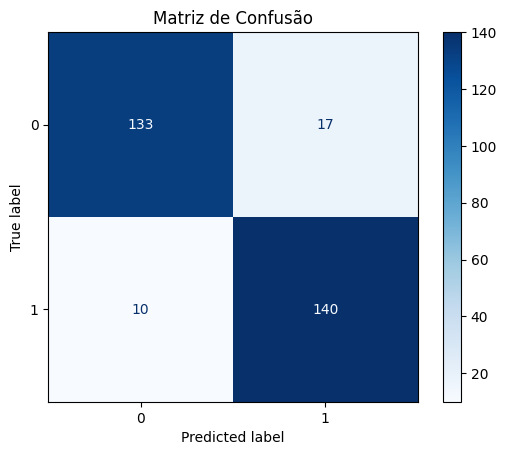

In [169]:
# Separar features (X) e rótulos (y)
X_train = data_treino['review']
y_train = data_treino['sentiment']

X_test = data_test['review']
y_test = data_test['sentiment']

# Vetorização usando CountVectorizer
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de classificação
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Previsões
y_pred = model.predict(X_test_tfidf)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


#### **10.1) Classificação de Sentimentos com pré-processamento Stemming**

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       150
           1       0.85      0.94      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



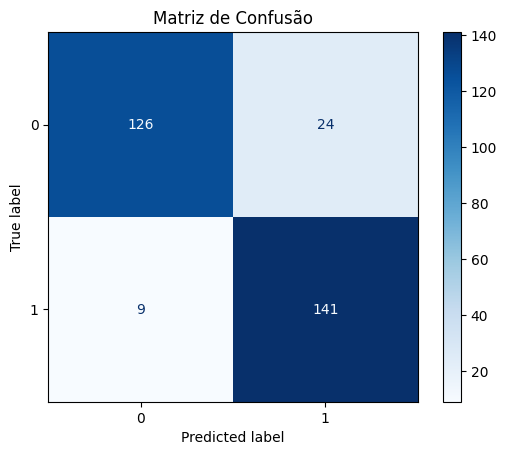

In [170]:
# Separar features (X) e rótulos (y)
X_train = data_treino['Stemmed']
y_train = data_treino['sentiment']

X_test = data_test['Stemmed']
y_test = data_test['sentiment']

# Vetorização usando CountVectorizer
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de classificação
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Previsões
y_pred = model.predict(X_test_tfidf)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


#### **10.2) Classificação de Sentimentos com pré-processamento e TF-IDF**

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       150
           1       0.94      0.96      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



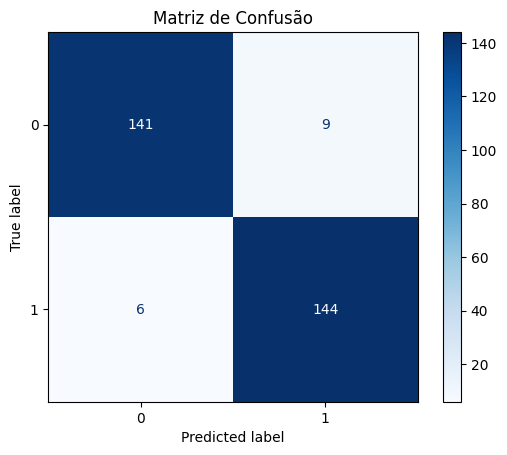

In [171]:

# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de classificação
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Previsões
y_pred = model.predict(X_test_tfidf)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


#### **10.3) Classificação de Sentimentos com pré-processamento, TF-IDF e utilizando Naive Bayes como modelo para classificação**


O **Naive Bayes** é um modelo probabilístico amplamente utilizado em tarefas de **classificação de texto**, incluindo a **classificação de sentimentos**. Seu principal fundamento é o **Teorema de Bayes**, que aplica a probabilidade condicional para prever a classe de uma instância com base nas suas características.

Neste caso, o objetivo é classificar **reviews de produtos** como **positivas** ou **negativas** com base nas palavras ou termos que aparecem no texto. O Naive Bayes é uma excelente escolha devido à sua simplicidade, eficiência e boa performance em problemas de texto.

###### **Princípio Básico do Naive Bayes**
O modelo de Naive Bayes baseia-se no **Teorema de Bayes**, que descreve a probabilidade de uma classe \( C \) dada uma instância de dados \( X \), que é composta por características (neste caso, as palavras do texto):

$
P(C|X) = \frac{P(X|C)P(C)}{P(X)}
$

Onde:
- $( P(C|X) )$ é a probabilidade de \( X \) pertencer à classe \( C \) (por exemplo, positivo ou negativo) dado \( X \) (as palavras no texto).
- $( P(X|C) )$ é a probabilidade de observar o conjunto de características \( X \) dado que a classe é \( C \).
- $( P(C) )$ é a probabilidade a priori de cada classe (por exemplo, a probabilidade de um review ser positivo ou negativo antes de observar o texto).
- $( P(X) )$ é a probabilidade de observar as características \( X \) em qualquer classe (também chamada de **evidência**).


No caso da **classificação de sentimentos**, o objetivo é determinar se um review é **positivo** ou **negativo** com base nas palavras presentes nele. Cada review pode ser visto como uma sequência de características (as palavras ou termos), e o Naive Bayes tenta calcular qual é a classe mais provável (positiva ou negativa) dado o conjunto de palavras.

O modelo aprende a **probabilidade a priori** de cada classe (quanto um review tende a ser positivo ou negativo) e a **probabilidade condicional** de cada palavra ocorrer em reviews positivos ou negativos. Com isso, ele é capaz de calcular a probabilidade de cada classe e escolher a classe com maior probabilidade.

###### **Vantagens do Naive Bayes**
- **Simplicidade:** O Naive Bayes é fácil de entender e implementar, o que o torna uma excelente escolha para tarefas iniciais de classificação de sentimentos.
- **Eficiência:** Devido à sua suposição de independência entre palavras, o modelo pode ser treinado rapidamente, mesmo em grandes volumes de dados de texto.
- **Bom Desempenho em Texto:** O Naive Bayes tem mostrado bons resultados em várias tarefas de NLP, como análise de sentimentos, detecção de spam, e outras, mesmo com a suposição de independência, que é muitas vezes não completamente verdadeira.
- **Robustez:** Mesmo quando a suposição de independência entre palavras não é totalmente válida, o modelo ainda pode funcionar bem, especialmente quando as palavras são indicativas de uma classe específica.

##### **Desvantagens**
- **Independência entre Características:** A principal limitação do Naive Bayes é a suposição de que as características (palavras) são independentes. Em textos, as palavras frequentemente dependem umas das outras, o que pode afetar a performance do modelo em textos mais complexos ou com dependências entre palavras.
- **Modelagem de Dependências Limitada:** Como o modelo não consegue capturar dependências entre palavras, ele pode falhar em capturar nuances de significado que dependem do contexto da palavra, como no caso de ironia ou sarcasmo.



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       150
           1       0.89      0.95      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



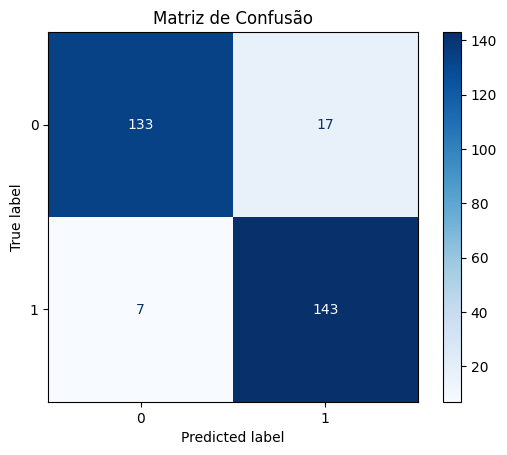

In [172]:
# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de classificação
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Previsões
y_pred = model.predict(X_test_tfidf)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

#### **11) Atividade Opcional**


Para aprimorar o desempenho do modelo de classificação de sentimentos, explore diferentes combinações de técnicas de pré-processamento de texto, métodos de vetorização e algoritmos de classificação.

Considere as seguintes abordagens:

1. **Pré-processamento:**
   - Aplicação de **Lematização** em vez de Stemming.
   - Remoção de **stopwords** específicas do domínio.
.

2. **Vetorização:**
   - Utilização de **TF-IDF** com diferentes parâmetros.
  

3. **Algoritmos de Classificação:**
   - Aplicação de **Máquinas de Vetores de Suporte (SVM)**.
   - Teste com **Árvores de Decisão**.
   - Avaliação de **Redes Neurais Artificiais**.

Para cada combinação, avalie o desempenho utilizando métricas como acurácia, precisão, recall e F1-score.



In [173]:
#Resposta